In [1]:
#pip install yfinance 

In [2]:
# Imports
import panel as pn
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
import matplotlib
import numpy as np
import seaborn as sns 
import yfinance as yf
import plotly.graph_objects as go
import plotly.figure_factory as ff
import alpaca_trade_api as tradeapi

%matplotlib inline

BTC_Ticker = yf.Ticker("BTC-AUD")
#BTC_Data = BTC_Ticker.history(period="max")
#BTC_Data

ETH_Ticker = yf.Ticker("ETH-AUD")
#ETH_Data = ETH_Ticker.history(period="max")
#ETH_Data

ADA_Ticker = yf.Ticker("ADA-AUD")
#ADA_Data = ADA_Ticker.history(period="max")
#ADA_Data

SOL_Ticker = yf.Ticker("SOL-AUD")
#SOL_Data = SOL_Ticker.history(period="max")
#SOL_Data

XRP_Ticker = yf.Ticker("XRP-AUD")
#XRP_Data = XRP_Ticker.history(period="max")
#XRP_Data

BCH_Ticker = yf.Ticker("BCH-AUD")
#BCH_Data = BCH_Ticker.history(period="max")
#BCH_Data

##Creat crypto DF 
crypto_data = yf.download("BCH-AUD XRP-AUD ADA-AUD SOL-AUD ETH-AUD BTC-AUD", period = "max")
#crypto_data = crypto_data.set_index("Date")

crypto_data.head(-10)


[*********************100%***********************]  6 of 6 completed


Adj Close                                                     \
             ADA-AUD     BCH-AUD       BTC-AUD      ETH-AUD     SOL-AUD   
Date                                                                      
2014-09-17       NaN         NaN    510.645386          NaN         NaN   
2014-09-18       NaN         NaN    472.650330          NaN         NaN   
2014-09-19       NaN         NaN    442.249359          NaN         NaN   
2014-09-20       NaN         NaN    458.053101          NaN         NaN   
2014-09-21       NaN         NaN    446.308197          NaN         NaN   
...              ...         ...           ...          ...         ...   
2022-02-08  1.649726  470.618103  61747.781250  4370.375000  158.987213   
2022-02-09  1.664756  481.857635  61778.222656  4513.606934  158.865707   
2022-02-10  1.609268  477.318848  60832.363281  4297.257812  148.296814   
2022-02-11  1.514011  449.226105  59430.949219  4102.467773  135.070633   
2022-02-12  1.482831  461.352753  59196.289062  4088.039062  134.408173   

                         Close                                         ...  \
             XRP-AUD   ADA-AUD     BCH-AUD       BTC-AUD      ETH-AUD  ...   
Date                                                                   ...   
2014-09-17       NaN       NaN         NaN    510.645386          NaN  ...   
2014-09-18       NaN       NaN         NaN    472.650330          NaN  ...   
2014-09-19       NaN       NaN         NaN    442.249359          NaN  ...   
2014-09-20       NaN       NaN         NaN    458.053101          NaN  ...   
2014-09-21       NaN       NaN         NaN    446.308197          NaN  ...   
...              ...       ...         ...           ...          ...  ...   
2022-02-08  1.229112  1.649726  470.618103  61747.781250  4370.375000  ...   
2022-02-09  1.213064  1.664756  481.857635  61778.222656  4513.606934  ...   
2022-02-10  1.158989  1.609268  477.318848  60832.363281  4297.257812  ...   
2022-02-11  1.065389  1.514011  449.226105  59430.949219  4102.467773  ...   
2022-02-12  1.152424  1.482831  461.352753  59196.289062  4088.039062  ...   

                    Open                                           Volume  \
                 BTC-AUD      ETH-AUD     SOL-AUD   XRP-AUD       ADA-AUD   
Date                                                                        
2014-09-17    513.122620          NaN         NaN       NaN           NaN   
2014-09-18    510.116119          NaN         NaN       NaN           NaN   
2014-09-19    472.275055          NaN         NaN       NaN           NaN   
2014-09-20    442.111572          NaN         NaN       NaN           NaN   
2014-09-21    457.135651          NaN         NaN       NaN           NaN   
...                  ...          ...         ...       ...           ...   
2022-02-08  61524.484375  4409.383301  164.715073  1.162145  3.173245e+09   
2022-02-09  61717.351562  4368.378906  158.901215  1.228162  1.726961e+09   
2022-02-10  61790.765625  4514.520996  158.868866  1.213410  2.527759e+09   
2022-02-11  60840.765625  4297.161133  148.334473  1.158892  1.956038e+09   
2022-02-12  59437.062500  4102.471680  135.098114  1.065422  1.963459e+09   

                                                                   \
                 BCH-AUD      BTC-AUD       ETH-AUD       SOL-AUD   
Date                                                                
2014-09-17           NaN     23511389           NaN           NaN   
2014-09-18           NaN     38400000           NaN           NaN   
2014-09-19           NaN     42477540           NaN           NaN   
2014-09-20           NaN     41294500           NaN           NaN   
2014-09-21           NaN     29744964           NaN           NaN   
...                  ...          ...           ...           ...   
2022-02-08  6.109002e+09  46297628942  2.398350e+10  3.737488e+09   
2022-02-09  5.770804e+09  32389006184  1.943867e+10  2.569336e+09   
2022-02-10  6.144877e+09  448

In [3]:
os.getcwd()

'/Users/coenemmenegger/Desktop/Group_Project/A_Team_Project'

In [4]:
#saving df as csv
crypto_data.to_csv("crytpo_df.csv")

In [5]:
#individual crypto df example 
hist_btc = BTC_Ticker.history(period = "max")
btc_df_close = hist_btc["Close"]
btc_df_close

Date
2014-09-17      510.645386
2014-09-18      472.650330
2014-09-19      442.249359
2014-09-20      458.053101
2014-09-21      446.308197
                  ...     
2022-02-18    55800.097656
2022-02-19    55927.195312
2022-02-20    53586.332031
2022-02-21    51605.378906
2022-02-22    51477.753906
Name: Close, Length: 2716, dtype: float64

In [6]:
#creating df to display close for individual crypto 
crypto_data_close = crypto_data.drop(columns = ["Adj Close", "Open", "Volume", "High", "Low"])
crypto_data_close

Close                                                     \
             ADA-AUD     BCH-AUD       BTC-AUD      ETH-AUD     SOL-AUD   
Date                                                                      
2014-09-17       NaN         NaN    510.645386          NaN         NaN   
2014-09-18       NaN         NaN    472.650330          NaN         NaN   
2014-09-19       NaN         NaN    442.249359          NaN         NaN   
2014-09-20       NaN         NaN    458.053101          NaN         NaN   
2014-09-21       NaN         NaN    446.308197          NaN         NaN   
...              ...         ...           ...          ...         ...   
2022-02-18  1.389899  433.479279  55800.097656  3883.089600  125.544319   
2022-02-19  1.390721  434.937317  55927.195312  3852.386719  127.539291   
2022-02-20  1.300780  422.673523  53586.332031  3665.224609  126.747299   
2022-02-21  1.194586  395.783020  51605.378906  3582.515381  115.699791   
2022-02-22  1.169901  393.851166  51477.753906  3530.546143  115.780869   

                      
             XRP-AUD  
Date                  
2014-09-17       NaN  
2014-09-18       NaN  
2014-09-19       NaN  
2014-09-20       NaN  
2014-09-21       NaN  
...              ...  
2022-02-18  1.095470  
2022-02-19  1.146541  
2022-02-20  1.085207  
2022-02-21  0.979159  
2022-02-22  0.958986  

[2716 rows x 6 columns]

In [7]:
#creating df without btc
crypto_data_close_nobtc = crypto_data_close.drop('BTC-AUD', axis = 1, level = 1)
crypto_data_close_nobtc

Close                                               
             ADA-AUD     BCH-AUD      ETH-AUD     SOL-AUD   XRP-AUD
Date                                                               
2014-09-17       NaN         NaN          NaN         NaN       NaN
2014-09-18       NaN         NaN          NaN         NaN       NaN
2014-09-19       NaN         NaN          NaN         NaN       NaN
2014-09-20       NaN         NaN          NaN         NaN       NaN
2014-09-21       NaN         NaN          NaN         NaN       NaN
...              ...         ...          ...         ...       ...
2022-02-18  1.389899  433.479279  3883.089600  125.544319  1.095470
2022-02-19  1.390721  434.937317  3852.386719  127.539291  1.146541
2022-02-20  1.300780  422.673523  3665.224609  126.747299  1.085207
2022-02-21  1.194586  395.783020  3582.515381  115.699791  0.979159
2022-02-22  1.169901  393.851166  3530.546143  115.780869  0.958986

[2716 rows x 5 columns]

In [8]:
#crypto_data_close = crypto_data_close.fillna(0)
#crypto_data_close.head()

In [9]:
#calculating daily returns 
daily_returns_crypto = crypto_data_close.pct_change()
daily_returns_crypto

Close                                                  
             ADA-AUD   BCH-AUD   BTC-AUD   ETH-AUD   SOL-AUD   XRP-AUD
Date                                                                  
2014-09-17       NaN       NaN       NaN       NaN       NaN       NaN
2014-09-18       NaN       NaN -0.074406       NaN       NaN       NaN
2014-09-19       NaN       NaN -0.064320       NaN       NaN       NaN
2014-09-20       NaN       NaN  0.035735       NaN       NaN       NaN
2014-09-21       NaN       NaN -0.025641       NaN       NaN       NaN
...              ...       ...       ...       ...       ...       ...
2022-02-18 -0.020565 -0.004075 -0.010718 -0.031479 -0.034062  0.026253
2022-02-19  0.000591  0.003364  0.002278 -0.007907  0.015891  0.046620
2022-02-20 -0.064672 -0.028197 -0.041856 -0.048583 -0.006210 -0.053495
2022-02-21 -0.081639 -0.063620 -0.036968 -0.022566 -0.087162 -0.097721
2022-02-22 -0.020664 -0.004881 -0.002473 -0.014506  0.000701 -0.020602

[2716 rows x 6 columns]

In [10]:
#daily returns excluding nan values 
daily_returns_crypto_formatted = daily_returns_crypto.dropna().copy()
daily_returns_crypto_formatted

Close                                                  
             ADA-AUD   BCH-AUD   BTC-AUD   ETH-AUD   SOL-AUD   XRP-AUD
Date                                                                  
2020-04-11  0.004186 -0.004451 -0.000934 -0.001240 -0.183202  0.003197
2020-04-12  0.015761  0.018332  0.018552  0.020723  0.138536  0.013227
2020-04-13 -0.030320 -0.059972 -0.027736 -0.039713 -0.127277 -0.022343
2020-04-14 -0.009663 -0.014038 -0.006059  0.002698 -0.153846 -0.018376
2020-04-15 -0.014577 -0.009914 -0.010074 -0.008105 -0.003751 -0.002590
...              ...       ...       ...       ...       ...       ...
2022-02-18 -0.020565 -0.004075 -0.010718 -0.031479 -0.034062  0.026253
2022-02-19  0.000591  0.003364  0.002278 -0.007907  0.015891  0.046620
2022-02-20 -0.064672 -0.028197 -0.041856 -0.048583 -0.006210 -0.053495
2022-02-21 -0.081639 -0.063620 -0.036968 -0.022566 -0.087162 -0.097721
2022-02-22 -0.020664 -0.004881 -0.002473 -0.014506  0.000701 -0.020602

[683 rows x 6 columns]

In [11]:
#checking type 
type(daily_returns_crypto)

pandas.core.frame.DataFrame

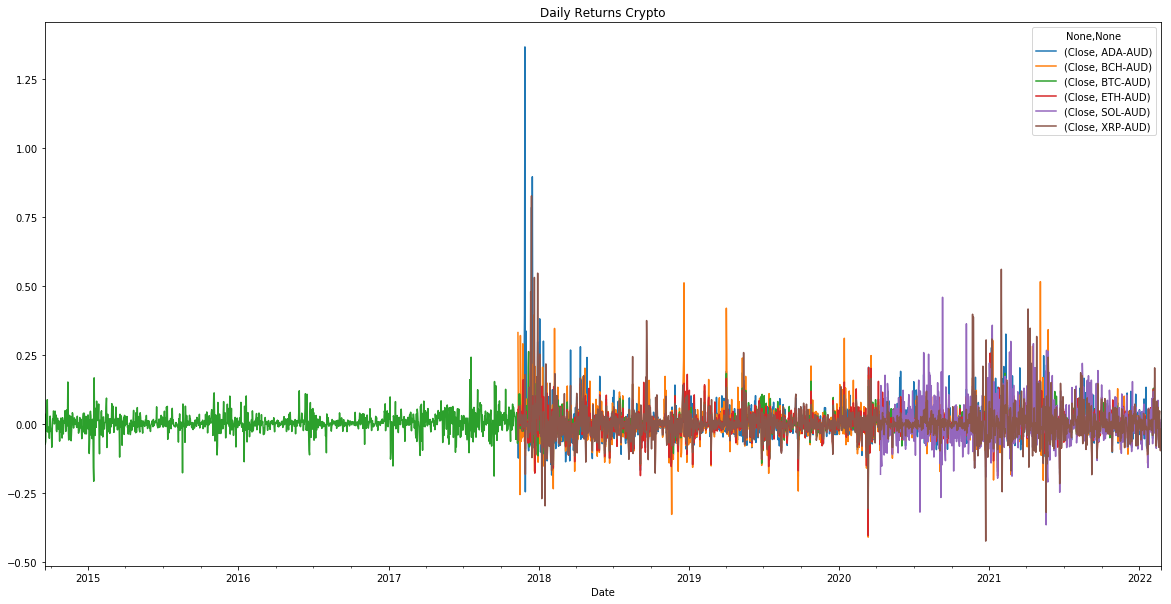

In [12]:
#plotting daily returns 
daily_returns_crypto.plot(figsize = (20,10), title = "Daily Returns Crypto")

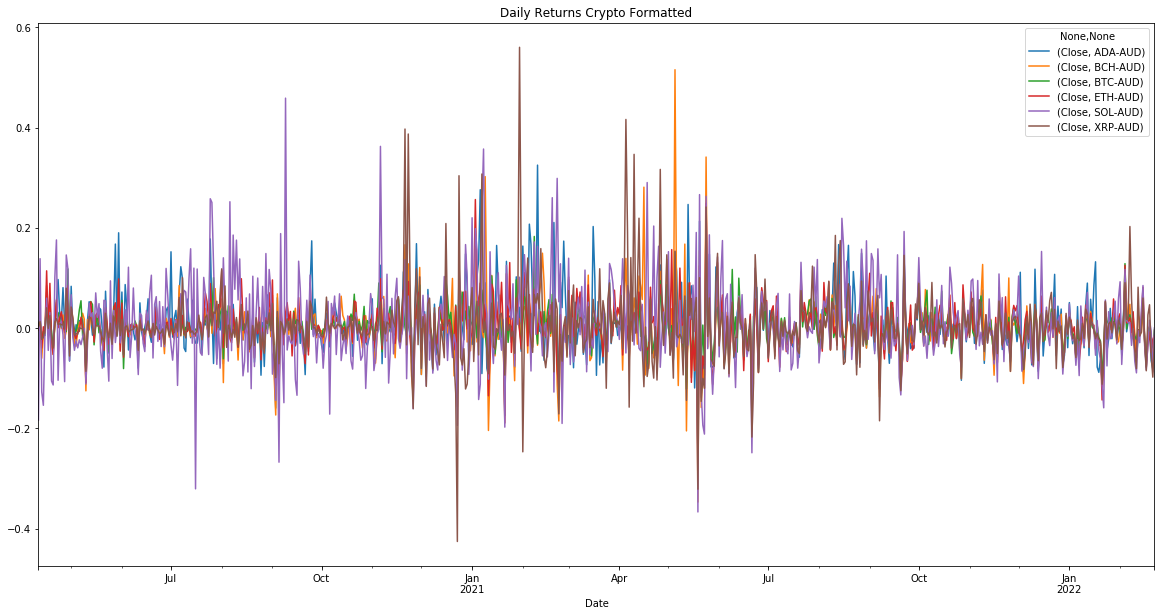

In [13]:
#plotting daily returns 
daily_returns_crypto_formatted.plot(figsize = (20,10), title = "Daily Returns Crypto Formatted")

In [14]:
#checking for nulls 
#daily_returns_crypto.isnull().sum()

In [15]:
#calculating cumulative retrurns
cumulative_returns_crypto = (1 + daily_returns_crypto).cumprod()
cumulative_returns_crypto

Close                                                     
              ADA-AUD   BCH-AUD     BTC-AUD   ETH-AUD    SOL-AUD   XRP-AUD
Date                                                                      
2014-09-17        NaN       NaN         NaN       NaN        NaN       NaN
2014-09-18        NaN       NaN    0.925594       NaN        NaN       NaN
2014-09-19        NaN       NaN    0.866060       NaN        NaN       NaN
2014-09-20        NaN       NaN    0.897008       NaN        NaN       NaN
2014-09-21        NaN       NaN    0.874008       NaN        NaN       NaN
...               ...       ...         ...       ...        ...       ...
2022-02-18  39.263792  0.329643  109.273674  9.940869  83.808295  4.064447
2022-02-19  39.287012  0.330751  109.522571  9.862269  85.140058  4.253932
2022-02-20  36.746236  0.321425  104.938444  9.383126  84.611356  4.026369
2022-02-21  33.746321  0.300976  101.059131  9.171387  77.236488  3.632906
2022-02-22  33.048974  0.299507  100.809202  9.038344  77.290612  3.558060

[2716 rows x 6 columns]

In [16]:
#calculating cumulative retrurns
cumulative_returns_crypto_formatted = (1 + daily_returns_crypto_formatted).cumprod()
cumulative_returns_crypto_formatted

Close                                                    
              ADA-AUD   BCH-AUD   BTC-AUD    ETH-AUD    SOL-AUD   XRP-AUD
Date                                                                     
2020-04-11   1.004186  0.995549  0.999066   0.998760   0.816798  1.003197
2020-04-12   1.020013  1.013800  1.017601   1.019458   0.929954  1.016466
2020-04-13   0.989086  0.953000  0.989377   0.978972   0.811592  0.993755
2020-04-14   0.979529  0.939623  0.983382   0.981614   0.686732  0.975494
2020-04-15   0.965250  0.930307  0.973475   0.973657   0.684156  0.972967
...               ...       ...       ...        ...        ...       ...
2022-02-18  26.566871  1.180697  5.160103  15.562640  83.808295  3.710037
2022-02-19  26.582582  1.184668  5.171857  15.439589  85.140058  3.882999
2022-02-20  24.863429  1.151264  4.955386  14.689481  84.611356  3.675279
2022-02-21  22.833611  1.078021  4.772198  14.357999  77.236488  3.316126
2022-02-22  22.361768  1.072759  4.760395  14.149717  77.290612  3.247806

[683 rows x 6 columns]

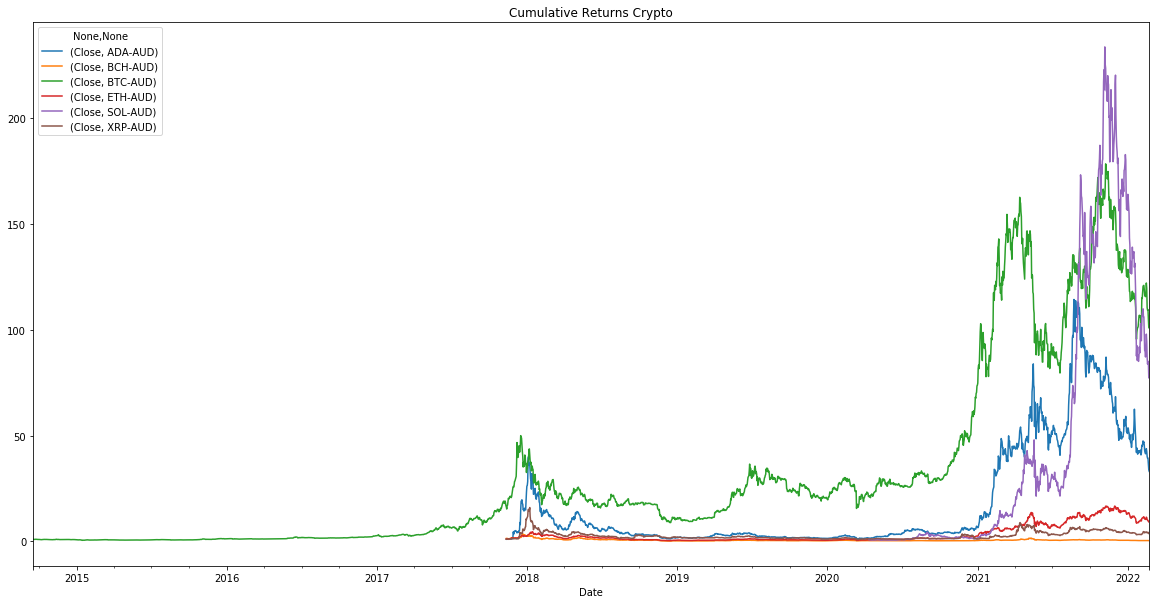

In [17]:
#plotting cumulative returns 
cumulative_returns_crypto.plot(figsize = (20,10), title = "Cumulative Returns Crypto")

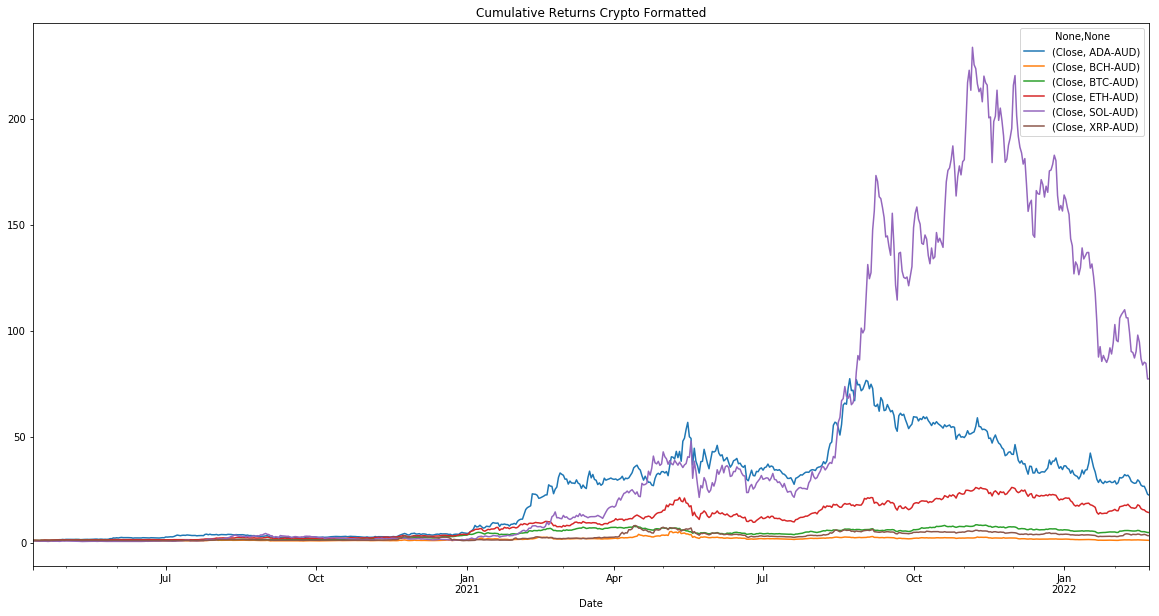

In [18]:
#plotting cumulative returns 
cumulative_returns_crypto_formatted.plot(figsize = (20,10), title = "Cumulative Returns Crypto Formatted")

In [19]:
#calculating the daily standard deviation 
daily_standard_deviation = daily_returns_crypto.std()
daily_standard_deviation

Close  ADA-AUD    0.078320
       BCH-AUD    0.066916
       BTC-AUD    0.038723
       ETH-AUD    0.050950
       SOL-AUD    0.084824
       XRP-AUD    0.069875
dtype: float64

A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out.

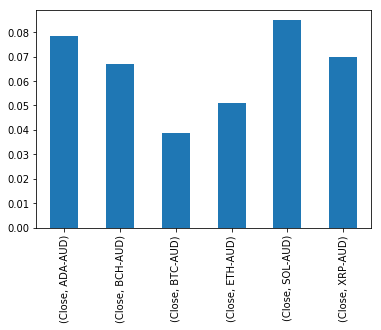

In [20]:
#plotting daily standard deviation 
daily_standard_deviation.plot(kind = "bar")

In [21]:
#annualised standard deviation
annualized_std = daily_returns_crypto.rolling(window = 252).std().mean()
annualized_std

Close  ADA-AUD    0.060097
       BCH-AUD    0.063087
       BTC-AUD    0.037897
       ETH-AUD    0.049844
       SOL-AUD    0.089194
       XRP-AUD    0.059819
dtype: float64

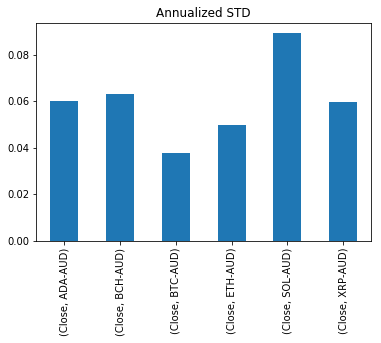

In [22]:
#plotting annualized std
annualized_std.plot(kind = "bar", title = "Annualized STD")

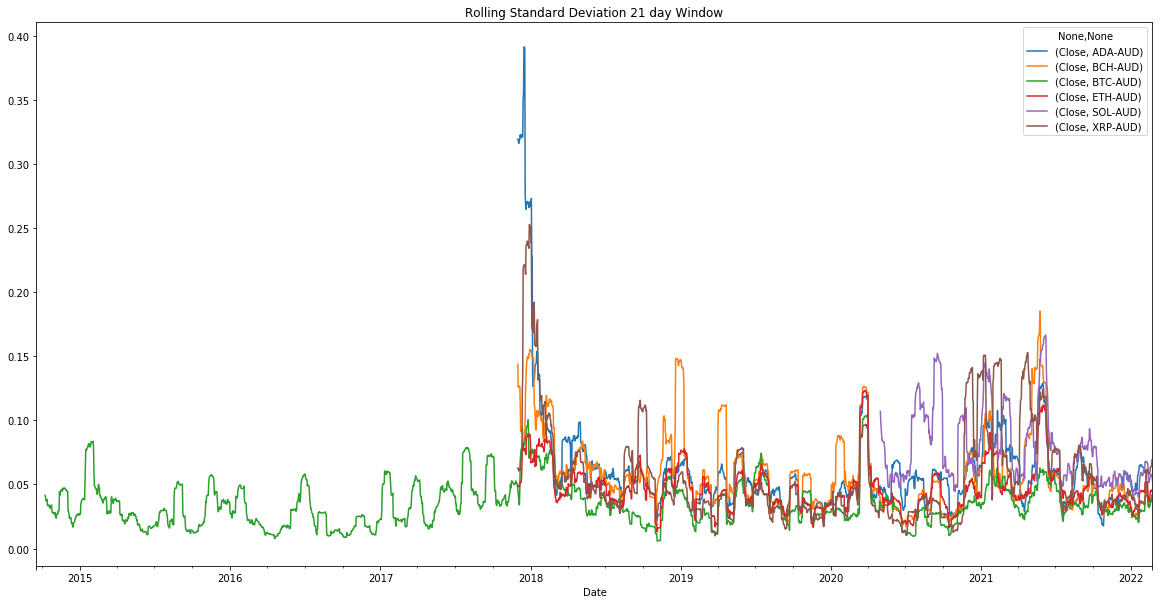

In [23]:
#plotting a 21 day rolling window of the standard deviation 
daily_returns_crypto.rolling(window=21).std().plot(figsize=(20,10),title = "Rolling Standard Deviation 21 day Window")

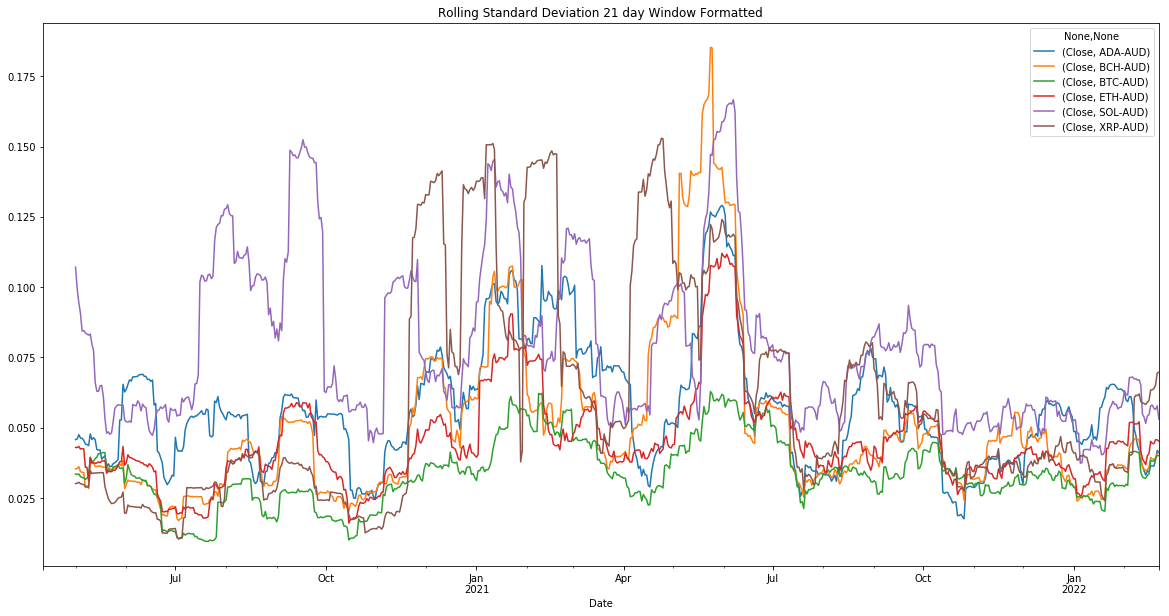

In [24]:
#plotting a 21 day rolling window of the standard deviation 
daily_returns_crypto_formatted.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviation 21 day Window Formatted")

While Pearson's measures a linear relationship between two variables, Kendall's measures the monotonic relationship. 

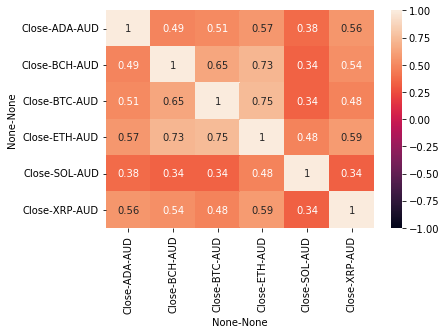

In [25]:
# Calculate the correlation using 'pearson' method
correlation_pearson = daily_returns_crypto.corr(method='pearson')

# Display the correlation matrix
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)

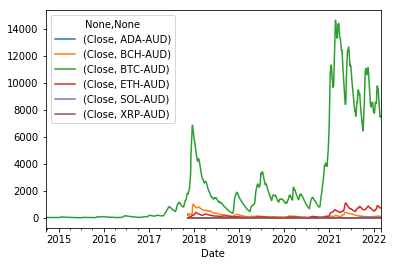

In [35]:
# Using `ewm` to calculate the rolling window
crypto_data_close.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0).std().plot()

In [27]:
#sharpe ration 
sharperatio = (daily_returns_crypto.mean()*252)/(daily_returns_crypto.std()* np.sqrt(252))
sharperatio

Close  ADA-AUD    0.978796
       BCH-AUD    0.335431
       BTC-AUD    1.006634
       ETH-AUD    0.849132
       SOL-AUD    1.852902
       XRP-AUD    0.696508
dtype: float64

In [28]:
daily_returns_crypto.std()

Close  ADA-AUD    0.078320
       BCH-AUD    0.066916
       BTC-AUD    0.038723
       ETH-AUD    0.050950
       SOL-AUD    0.084824
       XRP-AUD    0.069875
dtype: float64

the Sharpe ratio measures the performance of an investment such as a security or portfolio compared to a risk-free asset, after adjusting for its risk.

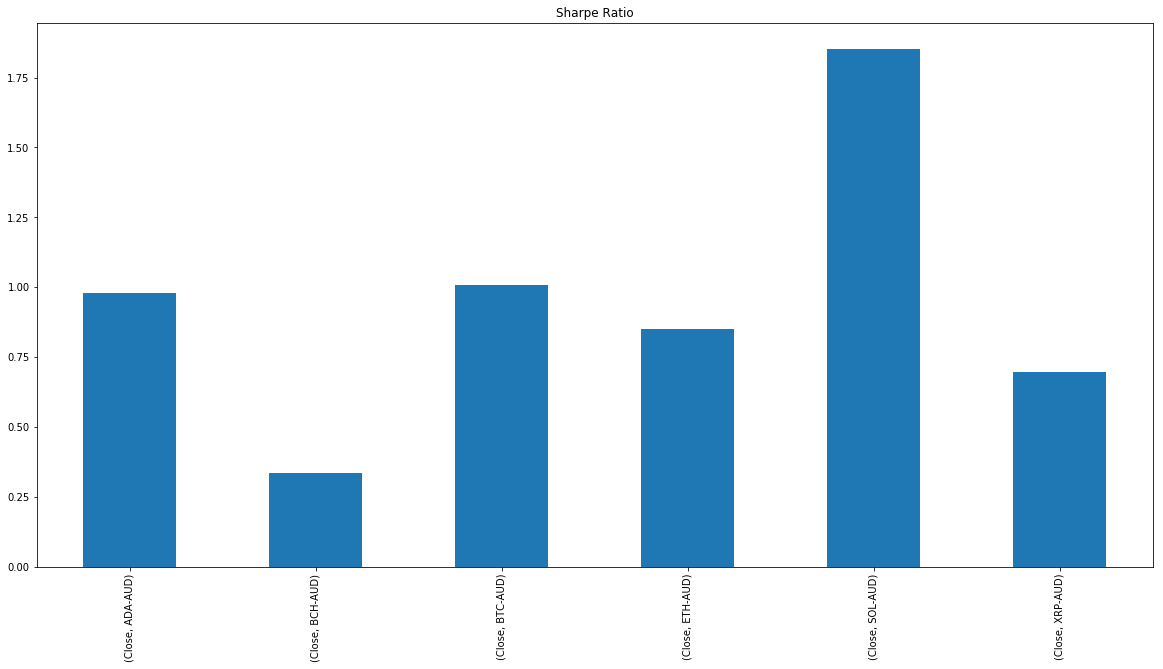

In [29]:
#plotting sharpe ratio
sharperatio.plot(kind = "bar", figsize=(20,10),title="Sharpe Ratio")

/Users/coenemmenegger/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


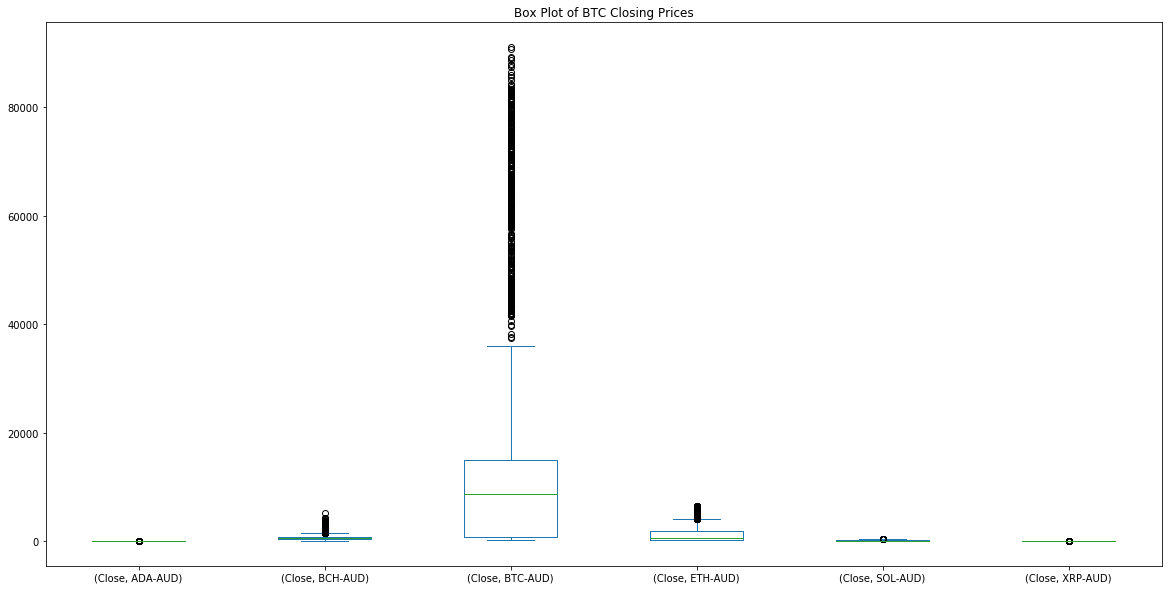

In [30]:
#box plot to visually show risk (btc only)
crypto_data_close.plot(kind = "box", figsize=(20,10),title="Box Plot of BTC Closing Prices")

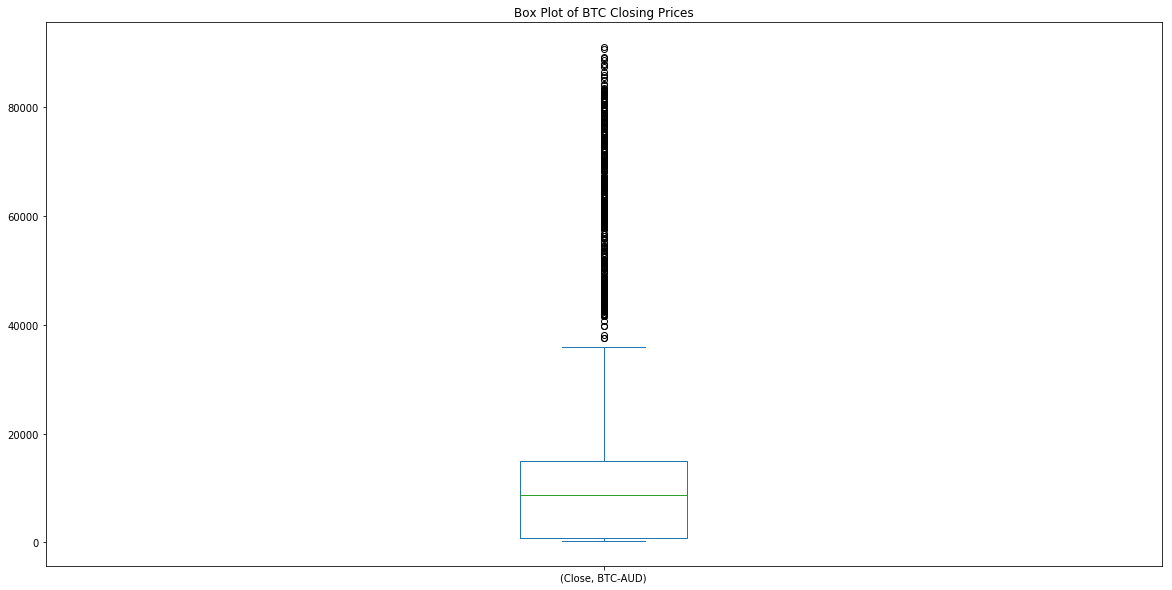

In [31]:
#box plot to visually show risk (btc only)
crypto_data_close["Close", "BTC-AUD"].plot(kind = "box", figsize=(20,10),title="Box Plot of BTC Closing Prices")

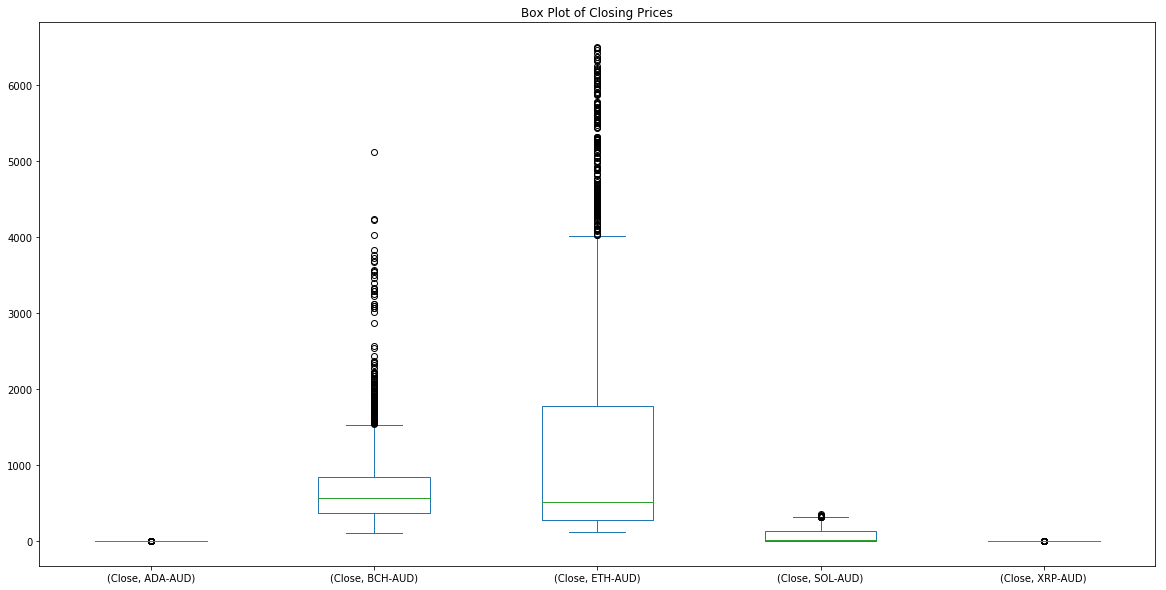

In [32]:
crypto_data_close_nobtc.plot(kind = "box", figsize=(20,10),title="Box Plot of Closing Prices")